# Project 02: Orbits of Charged Particles
**Due:** Monday, October 30, 2023 at the start of class<br>
**Name:** Nic Zaparniuk

# Project Instructions

You have been transported back in time to the office of Hantaro Nagaoka at Tokyo Univeristy in 1904 shortly after the discovery of the electron, but before the development of quantum mechanics.  Thankfully your computer, with python installed, made the trip with you. Hantaro is working on his "Saturnian" model for the structure of the atom. In this model, electrons orbit a positively charged center similar to the rings of saturn. You've offered to use python to help him work on his theory.   

Lucky for you and for Hantaro, you were learning how to work with `solve_ivp` to play electric field hockey in Physics 210 before you were transported back in time. The code you made for that and for Homework 02 serve as great starting points for exploring the Saturnian model!

Your task is to explore sets of parameters that support stable electron orbits. Your project must include a minimum of three particles, e.g., at least one electron and two charged nuclei or at least one charged nucleus and two electrons. Don't limit yourself to configurations that look strictly like an electron orbiting a compact nucleus. You can explore molecular-style orbitals within this "Saturnian" model or let your imagination take you to even more surprising configurations.

After some initial explorations to find a configuration of charges that you would find interesting to investigate, you should develop a research question based on exploring the phase space of your system. By this we mean that your investigation should consist of looking at orbital stability in response to systematic variation of one or more of the initial conditions in your system. How does orbital stability depend on the initial velocity or velocities of your orbiting charge(s) or the initial positions of your nuclei or orbiting charge(s)? Or are there other parameters in your system that you might investigate?

To communicate the results of your investigation you should develop a set of visualizations that communicate the critical results you will use to answer to your research question. It is likely that you will need multiple panels (subplots) to effectively communicate your these results, but try to keep your visualizations limited to one overall figure. The intention is for you to make a static figure that could be included in a report, not to make animations.

*Hint:* Like you did with your Homework 02 code code, it will be much easier to see how your system responds to changing initial conditions if you make a function that returns useful information about the properities of the oribit(s) in response to providing this function a set of initial conditions. 

# Background and Motivation
_(Provide some context for the problem and the specific research question(s) you set out to answer. Make sure to discuss why your specific research question(s) would be interesting to investigate. Make sure to explicitly state which parameters you are changing and which parameters you are keeping fixed. This is also the appropriate place to communicate your governing equations and introduce any additional equations that you might use to check the results of your code. Note: It is helpful for the graders if you are able to embed equations and calculations in the markdown or as images in the notebook instead of as additional files.)_



I initially started with two electrons orbiting around one proton; however, I wanted to create a further orbit. I found that if the charge of the proton was too weak the further electron would simple fly away, no matter the velocity. In order to avoid this I changed the charge of the proton to simulate a larger nucleus, and in my most recent simulation I have it at a charge of 3. This charge value was chosen due to the nature of a lithium atom, which as you all know has 3 electrons orbiting a nucleus of charge 3.

That brings me to the second talking point, in order to initialize the steady orbits I decided to change all the constants to either be 1 or -1 (respectively for the charge). This simplification helped to set the initial orbits and with the simulation properly working it made it easier to find the proper range of values using all of the real world counterparts for my constants. 

In order to determine what stable meant I decided to look at it from a fairly simply angle. I decided to figure that if an electron were not stable it would collapse into the proton causing the simulation to break or that one of the electrons would be thrown far away from the system. My approach puts a three dimensional boundary at an adjustable length away from the center of the proton. As the simulation runs, if any of the three electrons passes outside of this barrier it will be flagged as unstable orbit. 

The research that I have decided to undertake was partially inspired by some of the work I have heard about at the TRIUMF Research Facility and how many of the experiments performed there utilize Lithium-isotope-chains. Although far simpler, my research project is attempting to show the range of positions and velocities in which the third outer electron is most stable. 

#### For my research I am asking the question, where is the area of most stability for the orbit of the third electron over a given range of positions? 

There are many different equations that I will be using throughout this project. I will provide them here with a brief explanation of how it was used.

\begin{align*}
r &= \sqrt{x_e^2 + y_e^2 + z_e^2} \\
re12 &= \sqrt{(x_{e1} - x_{e2})^2 + (y_{e1} - y_{e2})^2 + (z_{e1} - z_{e2})^2} \\
F &= \frac{k \cdot q_{\text{proton}} \cdot q_{\text{electron}}}{r^2} \\
Fe12 &= \frac{k \cdot q_{\text{electron}} \cdot q_{\text{electron}}}{re12^2} \\
ax_{e1} &= \frac{F1}{m_{\text{electron}}} \cdot \frac{x_{e1}}{r1} + \sum_{n} \left(\frac{Fe1n}{m_{\text{electron}}}\right) \cdot \frac{x_{e1}}{re1n}
\end{align*}

The first equation is used to calculate the distance of the proton of the three electrons and is useful to calculate the force between the proton and electrons.

The second equation is used to calculated the distance between the first two electrons however the equation is modified later on to represent the distance between the two electrons and the third electron. This equation is useful in calculating the force between the electrons.

The third equation is simply a force equation to find the force between the proton and electrons.

The fourth equation is an equation that takes the distance between the electrons and is used to calculate the force felt between the electrons.

The fifth equation is very useful as it finds the acceleration of the electrons by taking the force experienced by the proton and then sums all of the forces experienced by each electron.

# Methodology and computational code:
_(How did you go about answering your question(s)?  In 3-5 sentences, provide an overview of how your code below solves the problem. Additionally, include brief descriptions of any python packages you used beyond from the standard ones (i.e., those other than NumPy, Matplotlib or SciPy). You should also add citations for any of these in the references section. )_


I want to present the initial conditions using the chosen velocities of [0, 0.3x1.188e6, -0.5x1.188e6] (vx,vy,vz) of the third outer electron over an extended simulation period in order to see how the electron orbits evolve over time. I will create several different ways to visualize my results: the first will be a showing 2D vs 3D visualization in order to compare how the electron moves in the XY, XZ, and YZ planes in addition to a 3D visualization. This will make it easier for others reviewing my results to analyze the electron orbits. Second, I plan on creating a set of subplots with different initial conditions to show how the orbits change over a uniformly randomized range of positions. Third, I want to create a parameter space demonstrating if a set of initial conditions satisfies my definition of a stable orbit. This will help by better visualizing the area of best stability in three dimensional space. And, as we know that the proton is locked at a position of (0,0,0) it makes it much easier to understand where the electron is stable and where it is not.

I did not need to use any imports other than Numpy, Scipy, or Matplotlib. However, I had to use an extension of matplotlib using the mpl_toolkits.mplot_3d which will be referenced below.

_(Below is the part of your notebook that should include the majority of your code.  Don’t put plots here, though, as they belong in the Data Vizualization section.)_


### Electron Orbit Visualization code 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
k = 8.9875517923e9  # Coulomb's constant in N m^2 / C^2
q_proton = 3 * 1.60217663e-19  # Charge of a proton in Coulombs
q_electron = -1 * 1.60217663e-19  # Charge of an electron in Coulombs
m_proton = 1.67e-27  # Mass of a proton in kg
m_electron = 9.10938370125e-31  # Mass of an electron in kg

# Define the system of differential equations
def dif_eqns(t, state):
    # Unpack the state vector into positions and velocities
    x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1, x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2, x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3 = state

    # Calculate distances
    r1 = np.sqrt(x_e1**2 + y_e1**2 + z_e1**2)
    r2 = np.sqrt(x_e2**2 + y_e2**2 + z_e2**2)
    r3 = np.sqrt(x_e3**2 + y_e3**2 + z_e3**2)
    re12 = np.sqrt((x_e1 - x_e2)**2 + (y_e1 - y_e2)**2 + (z_e1 - z_e2)**2)
    re13 = np.sqrt((x_e1 - x_e3)**2 + (y_e1 - y_e3)**2 + (z_e1 - z_e3)**2)
    re23 = np.sqrt((x_e2 - x_e3)**2 + (y_e2 - y_e3)**2 + (z_e2 - z_e3)**2)

    # Calculate forces with correct signs
    F1 = k * q_proton * q_electron / r1**2
    F2 = k * q_proton * q_electron / r2**2
    F3 = k * q_proton * q_electron / r3**2
    Fe12 = k * q_electron * q_electron / re12**2
    Fe13 = k * q_electron * q_electron / re13**2
    Fe23 = k * q_electron * q_electron / re23**2

    # Calculate accelerations with correct signs
    ax_e1 = (F1 / m_electron) * (x_e1 / r1) + (Fe12 / m_electron) * (x_e1 / re12) + (Fe13 / m_electron) * (x_e1 / re13)
    ay_e1 = (F1 / m_electron) * (y_e1 / r1) + (Fe12 / m_electron) * (y_e1 / re12) + (Fe13 / m_electron) * (y_e1 / re13)
    az_e1 = (F1 / m_electron) * (z_e1 / r1) + (Fe12 / m_electron) * (z_e1 / re12) + (Fe13 / m_electron) * (z_e1 / re13)
    ax_e2 = (F2 / m_electron) * (x_e2 / r2) + (Fe12 / m_electron) * (x_e2 / re12) + (Fe23 / m_electron) * (x_e2 / re23)
    ay_e2 = (F2 / m_electron) * (y_e2 / r2) + (Fe12 / m_electron) * (y_e2 / re12) + (Fe23 / m_electron) * (y_e2 / re23)
    az_e2 = (F2 / m_electron) * (z_e2 / r2) + (Fe12 / m_electron) * (z_e2 / re12) + (Fe23 / m_electron) * (z_e2 / re23)
    ax_e3 = (F3 / m_electron) * (x_e3 / r3) + (Fe13 / m_electron) * (x_e3 / re13) + (Fe23 / m_electron) * (x_e3 / re23)
    ay_e3 = (F3 / m_electron) * (y_e3 / r3) + (Fe13 / m_electron) * (y_e3 / re13) + (Fe23 / m_electron) * (y_e3 / re23)
    az_e3 = (F3 / m_electron) * (z_e3 / r3) + (Fe13 / m_electron) * (z_e3 / re13) + (Fe23 / m_electron) * (z_e3 / re23)

    # Define the derivatives of the state vector (3D)
    dxdt = [vx_e1, vy_e1, vz_e1, ax_e1, ay_e1, az_e1, vx_e2, vy_e2, vz_e2, ax_e2, ay_e2, az_e2, vx_e3, vy_e3, vz_e3, ax_e3, ay_e3, az_e3]

    return dxdt

# Define custom event to check boundary
def boundary_event(t, state):
    # Unpack the electron positions
    x_e1, y_e1, z_e1, _, _, _, x_e2, y_e2, z_e2, _, _, _, x_e3, y_e3, z_e3, _, _, _ = state
    
    # Define the dimensions of the box
    box_length = 200e-10
    
    # Check if any electron crosses the boundaries
    if (
        abs(x_e1) > box_length/2 or
        abs(y_e1) > box_length/2 or
        abs(z_e1) > box_length/2 or
        abs(x_e2) > box_length/2 or
        abs(y_e2) > box_length/2 or
        abs(z_e2) > box_length/2 or
        abs(x_e3) > box_length/2 or
        abs(y_e3) > box_length/2 or
        abs(z_e3) > box_length/2
    ):
        return 0  # Trigger the event
    return 1  # Continue the simulation
def electron_orbits(electron1, electron2, electron3):
    t0 = 0
    tmax = 1e-14  # Adjust the simulation time range
    t_eval = np.linspace(t0, tmax, num=1000)  # You can increase the number of points if needed
    events = [boundary_event]

    # Unpack the initial state into positions and velocities
    x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1, x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2, x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3 = electron1 + electron2 + electron3

    state = [
        x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1,
        x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2,
        x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3
    ]

    # Solve the system of differential equations
    sol = solve_ivp(dif_eqns, [t0, tmax], state, t_eval=t_eval, rtol=1e-6, atol=1e-9, events=events,)

    # Extract particle positions
    x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1, x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2, x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3 = sol.y

    if len(sol.t_events[0]) > 0:
        print("Unstable orbit detected due to electron crossing the boundary at t =", sol.t_events[0])
    else:
        print("Simulation Completed Without Electron Crossing the Boundary")

# Create a 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Plot the trajectories in XY plane
    axes[0, 0].plot(0, 0, 'ro', label='Proton')
    axes[0, 0].plot(x_e1, y_e1, label='Electron 1', color='blue', linestyle='-')
    axes[0, 0].plot(x_e2, y_e2, label='Electron 2', color='green', linestyle='-')
    axes[0, 0].plot(x_e3, y_e3, label='Electron 3', color='orange', linestyle='-')
    axes[0, 0].set_title('Electron Orbits Around a Proton (XY)')
    axes[0, 0].set_xlabel('X Position (m)')
    axes[0, 0].set_ylabel('Y Position (m)')
    axes[0, 0].legend()
    axes[0, 0].grid()

    # Plot the trajectories in XZ plane
    axes[0, 1].plot(0, 0, 'ro', label='Proton')
    axes[0, 1].plot(x_e1, z_e1, label='Electron 1', color='blue', linestyle='-')
    axes[0, 1].plot(x_e2, z_e2, label='Electron 2', color='green', linestyle='-')
    axes[0, 1].plot(x_e3, z_e3, label='Electron 3', color='orange', linestyle='-')
    axes[0, 1].set_title('Electron Orbits Around a Proton (XZ)')
    axes[0, 1].set_xlabel('X Position (m)')
    axes[0, 1].set_ylabel('Z Position (m)')
    axes[0, 1].legend()
    axes[0, 1].grid()

    # Plot the trajectories in YZ plane
    axes[1, 0].plot(0, 0, 'ro', label='Proton')
    axes[1, 0].plot(y_e1, z_e1, label='Electron 1', color='blue', linestyle='-')
    axes[1, 0].plot(y_e2, z_e2, label='Electron 2', color='green', linestyle='-')
    axes[1, 0].plot(y_e3, z_e3, label='Electron 3', color='orange', linestyle='-')
    axes[1, 0].set_title('Electron Orbits Around a Proton (YZ)')
    axes[1, 0].set_xlabel('Y Position (m)')
    axes[1, 0].set_ylabel('Z Position (m)')
    axes[1, 0].legend()
    axes[1, 0].grid()

    # Plot the trajectories in 3D
    ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
    ax_3d.plot(0, 0, 0, 'ro', label='Proton')
    ax_3d.plot(x_e1, y_e1, z_e1, label='Electron 1', color='blue', linestyle='-')
    ax_3d.plot(x_e2, y_e2, z_e2, label='Electron 2', color='green', linestyle='-')
    ax_3d.plot(x_e3, y_e3, z_e3, label='Electron 3', color='orange', linestyle='-')
    ax_3d.set_xlabel('X Position (m)')
    ax_3d.set_ylabel('Y Position (m)')
    ax_3d.set_zlabel('Z Position (m)')
    ax_3d.view_init(elev=20, azim=70)
    ax_3d.set_title('Neutral Lithium Atom (3D)')
    ax_3d.legend()

    plt.tight_layout()
    plt.show()
    

## Electron Orbit Function Without Visualizations

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
k = 8.9875517923e9  # Coulomb's constant in N m^2 / C^2
q_proton = 3 * 1.60217663e-19  # Charge of a proton in Coulombs
q_electron = -1 * 1.60217663e-19  # Charge of an electron in Coulombs
m_proton = 1.67e-27  # Mass of a proton in kg
m_electron = 9.10938370125e-31  # Mass of an electron in kg

# Define the system of differential equations
def dif_eqns(t, state):
    # Unpack the state vector into positions and velocities
    x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1, x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2, x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3 = state

    # Calculate distances
    r1 = np.sqrt(x_e1**2 + y_e1**2 + z_e1**2)
    r2 = np.sqrt(x_e2**2 + y_e2**2 + z_e2**2)
    r3 = np.sqrt(x_e3**2 + y_e3**2 + z_e3**2)
    re12 = np.sqrt((x_e1 - x_e2)**2 + (y_e1 - y_e2)**2 + (z_e1 - z_e2)**2)
    re13 = np.sqrt((x_e1 - x_e3)**2 + (y_e1 - y_e3)**2 + (z_e1 - z_e3)**2)
    re23 = np.sqrt((x_e2 - x_e3)**2 + (y_e2 - y_e3)**2 + (z_e2 - z_e3)**2)

    # Calculate forces with correct signs
    F1 = k * q_proton * q_electron / r1**2
    F2 = k * q_proton * q_electron / r2**2
    F3 = k * q_proton * q_electron / r3**2
    Fe12 = k * q_electron * q_electron / re12**2
    Fe13 = k * q_electron * q_electron / re13**2
    Fe23 = k * q_electron * q_electron / re23**2

    # Calculate accelerations with correct signs
    ax_e1 = (F1 / m_electron) * (x_e1 / r1) + (Fe12 / m_electron) * (x_e1 / re12) + (Fe13 / m_electron) * (x_e1 / re13)
    ay_e1 = (F1 / m_electron) * (y_e1 / r1) + (Fe12 / m_electron) * (y_e1 / re12) + (Fe13 / m_electron) * (y_e1 / re13)
    az_e1 = (F1 / m_electron) * (z_e1 / r1) + (Fe12 / m_electron) * (z_e1 / re12) + (Fe13 / m_electron) * (z_e1 / re13)
    ax_e2 = (F2 / m_electron) * (x_e2 / r2) + (Fe12 / m_electron) * (x_e2 / re12) + (Fe23 / m_electron) * (x_e2 / re23)
    ay_e2 = (F2 / m_electron) * (y_e2 / r2) + (Fe12 / m_electron) * (y_e2 / re12) + (Fe23 / m_electron) * (y_e2 / re23)
    az_e2 = (F2 / m_electron) * (z_e2 / r2) + (Fe12 / m_electron) * (z_e2 / re12) + (Fe23 / m_electron) * (z_e2 / re23)
    ax_e3 = (F3 / m_electron) * (x_e3 / r3) + (Fe13 / m_electron) * (x_e3 / re13) + (Fe23 / m_electron) * (x_e3 / re23)
    ay_e3 = (F3 / m_electron) * (y_e3 / r3) + (Fe13 / m_electron) * (y_e3 / re13) + (Fe23 / m_electron) * (y_e3 / re23)
    az_e3 = (F3 / m_electron) * (z_e3 / r3) + (Fe13 / m_electron) * (z_e3 / re13) + (Fe23 / m_electron) * (z_e3 / re23)

    # Define the derivatives of the state vector (3D)
    dxdt = [vx_e1, vy_e1, vz_e1, ax_e1, ay_e1, az_e1, vx_e2, vy_e2, vz_e2, ax_e2, ay_e2, az_e2, vx_e3, vy_e3, vz_e3, ax_e3, ay_e3, az_e3]

    return dxdt

# Define custom event to check boundary
def boundary_event(t, state):
    # Unpack the electron positions
    x_e1, y_e1, z_e1, _, _, _, x_e2, y_e2, z_e2, _, _, _, x_e3, y_e3, z_e3, _, _, _ = state
    
    # Define the dimensions of the box
    box_length = 200e-10
    
    # Check if any electron crosses the boundaries
    if (
        abs(x_e1) > box_length/2 or
        abs(y_e1) > box_length/2 or
        abs(z_e1) > box_length/2 or
        abs(x_e2) > box_length/2 or
        abs(y_e2) > box_length/2 or
        abs(z_e2) > box_length/2 or
        abs(x_e3) > box_length/2 or
        abs(y_e3) > box_length/2 or
        abs(z_e3) > box_length/2
    ):
        return 0  # Trigger the event
    return 1  # Continue the simulation

def electron_orbits_test(electron1, electron2, electron3):
    t0 = 0
    tmax = 1e-14
    t_eval = np.linspace(t0, tmax, num=1000)
    events = [boundary_event]

    x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1, x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2, x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3 = electron1 + electron2 + electron3

    state = [
        x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1,
        x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2,
        x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3
    ]

    # Solve the system of differential equations
    sol = solve_ivp(dif_eqns, [t0, tmax], state, t_eval=t_eval, rtol=1e-10, atol=1e-12, events=events)

    # Extract particle positions
    x_e1, y_e1, z_e1, vx_e1, vy_e1, vz_e1, x_e2, y_e2, z_e2, vx_e2, vy_e2, vz_e2, x_e3, y_e3, z_e3, vx_e3, vy_e3, vz_e3 = sol.y
    
    if len(sol.t_events[0]) > 0:
        print("Unstable orbit detected due to electron crossing the boundary at t =", sol.t_events[0])
        return "Unstable"
    else:
        print("Simulation Completed Without Electron Crossing the Boundary")
        return "Stable"
        

### Test

In [29]:
electron_orbits_test([5.291e-11, 0, 0, 0, 2.8*1.188e6, 0*1.188e6],[-5.291e-11, 0, 0, 0, -2.8*1.188e6, 0*1.188e6],[10*5.291e-11, 0, 0, 0, 0.3*1.188e6, -0.5*1.188e6])

Simulation Completed Without Electron Crossing the Boundary


'Stable'

# Error testing

_(Convince yourself that your system, from a physics and a coding perspective, is behaving correctly and provide your most compelling evidence here. This may include calculations, notes, common-sense checking of the input and output from your code, or running the code with specific parameters to make sure everything behaves how you expect. It may also include visualizations whose purpose is strictly related to error checking. Use as many code and markdown cells as you need. Note: It is helpful for the graders if you are able to embed equations and calculations in the markdown or as images in the notebook instead of as additional files.)_

## Initial Conditions Stability Test (Position)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Define the range for the stability test
x_range = (-10*5.291e-11, 10*5.291e-11)
y_range = (-10*5.291e-11, 10*5.291e-11)
z_range = (-10*5.291e-11, 10*5.291e-11)

def stability_test(num_trials=100, x_range=(-1e-10, 1e-10), y_range=(-1e-10, 1e-10), z_range=(-1e-10, 1e-10)):
    # Lists to store results
    stable_conditions = []
    unstable_conditions = []

    for _ in range(num_trials):
        # Generate pseudorandom initial conditions within specified ranges
        initial_x_e = np.random.uniform(*x_range)
        initial_y_e = np.random.uniform(*y_range)
        initial_z_e = np.random.uniform(*z_range)

        # Run the simulation using the electron_orbits function
        electron1 = [5.291e-11, 0, 0, 0, 3.3 * 1.188e6, 0.1 * 1.188e6]
        electron2 = [-5.291e-11, 0, 0, 0, -3.3 * 1.188e6, -0.1 * 1.188e6]
        electron3 = [initial_x_e, initial_y_e, initial_z_e, 0, 0.3 * 1.188e6, -0.5 * 1.188e6]

        # Call the electron_orbits function to get the results
        result = electron_orbits_test(electron1, electron2, electron3)

        # Check if the simulation is stable
        if result == "Unstable":
            unstable_conditions.append((initial_x_e, initial_y_e, initial_z_e))
        else:
            stable_conditions.append((initial_x_e, initial_y_e, initial_z_e))

        # Print the points used during each iteration and whether it is stable or unstable
        print(f"Iteration {_ + 1}: Initial Position = ({initial_x_e}, {initial_y_e}, {initial_z_e}), Result = {result}")
        
    # Separate the components for plotting
    if stable_conditions:
        x_stable, y_stable, z_stable = zip(*stable_conditions)
    else:
        x_stable, y_stable, z_stable = [], [], []

    # Check if there are any unstable conditions before trying to unzip
    if unstable_conditions:
        x_unstable, y_unstable, z_unstable = zip(*unstable_conditions)
    else:
        x_unstable, y_unstable, z_unstable = [], [], []

    
    # Plot the results on subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # XY Plane
    axs[0, 0].scatter(x_stable, y_stable, c='b', label='Stable')
    axs[0, 0].scatter(x_unstable, y_unstable, c='r', label='Unstable')
    axs[0, 0].set_xlim(x_range)
    axs[0, 0].set_ylim(y_range)
    axs[0, 0].set_title('XY Plane')
    axs[0, 0].set_xlabel('X Position (m)')
    axs[0, 0].set_ylabel('Y Position (m)')
    axs[0, 0].legend()
    axs[0, 0].grid()

    # XZ Plane
    axs[0, 1].scatter(x_stable, z_stable, c='b', label='Stable')
    axs[0, 1].scatter(x_unstable, z_unstable, c='r', label='Unstable')
    axs[0, 1].set_xlim(x_range)
    axs[0, 1].set_ylim(z_range)
    axs[0, 1].set_title('XZ Plane')
    axs[0, 1].set_xlabel('X Position (m)')
    axs[0, 1].set_ylabel('Z Position (m)')
    axs[0, 1].legend()
    axs[0, 1].grid()

    # YZ Plane
    axs[1, 0].scatter(y_stable, z_stable, c='b', label='Stable')
    axs[1, 0].scatter(y_unstable, z_unstable, c='r', label='Unstable')
    axs[1, 0].set_xlim(y_range)
    axs[1, 0].set_ylim(z_range)
    axs[1, 0].set_title('YZ Plane')
    axs[1, 0].set_xlabel('Y Position (m)')
    axs[1, 0].set_ylabel('Z Position (m)')
    axs[1, 0].legend()
    axs[1, 0].grid()

    # Scatter plot for both stable and unstable conditions
    ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
    ax_3d.scatter(x_stable, y_stable, z_stable, c='b', label='Stable')
    ax_3d.scatter(x_unstable, y_unstable, z_unstable, c='r', label='Unstable')
    ax_3d.set_xlim(x_range)
    ax_3d.set_ylim(y_range)
    ax_3d.set_zlim(z_range)
    ax_3d.set_title('Stable and Unstable Initial Conditions')
    ax_3d.set_xlabel('X Position (m)')
    ax_3d.set_ylabel('Y Position (m)')
    ax_3d.set_zlabel('Z Position (m)')
    ax_3d.view_init(elev=20, azim=70)
    ax_3d.legend()
    
    plt.show()

# Test the stability over 50 iterations and plot the results
stability_test(num_trials=100, x_range=x_range, y_range=y_range, z_range=z_range)

# Data visualization, interpretation and presentation of results
_(This section should include code that produces your visualizations and any other aspects of your data or results that you would like to present. Make sure to provide caption-style summaries with everything presented in this section so that the reader can understand and correctly interpret your visualizations and presented results.)_

In [ ]:
# Add additional cells as needed, but your main visualizations should be produced in the section below
electron_orbits([5.291e-11, 0, 0, 0, 2.8*1.188e6, 0*1.188e6],[-5.291e-11, 0, 0, 0, -2.8*1.188e6, 0*1.188e6],[10*5.291e-11, 0, 0, 0, 0.3*1.188e6, -0.5*1.188e6])

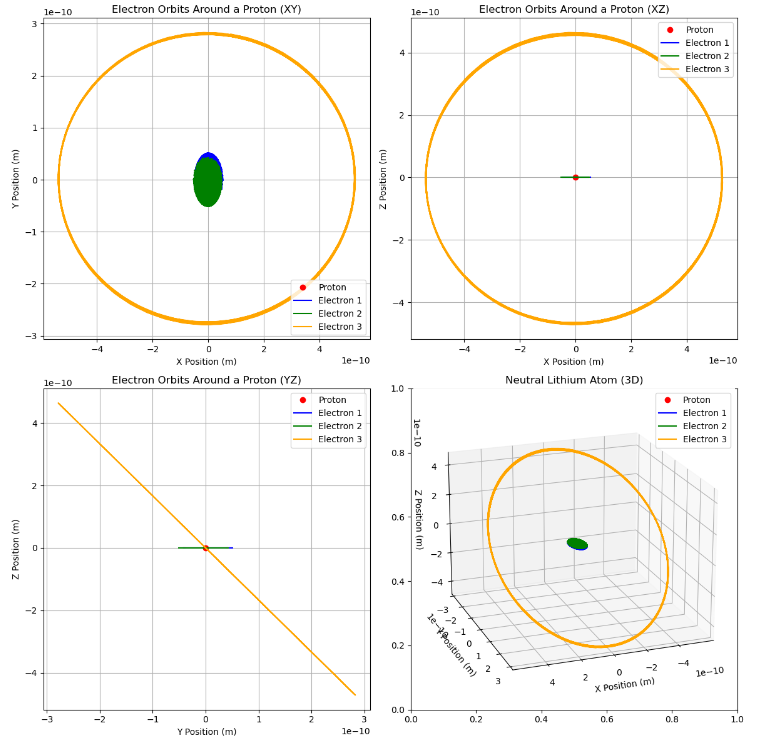

- The graph above visualizes the position I found to produce the most stable orbit over the course of this project

In [ ]:
electron_orbits([5.291e-11, 0, 0, 0, 2.8*1.188e6, 0*1.188e6],[-5.291e-11, 0, 0, 0, -2.8*1.188e6, 0*1.188e6],[5.226474067901309e-10, 3.649286597960025e-10, -5.854159460002215e-11, 0, 0.3*1.188e6, -0.5*1.188e6])

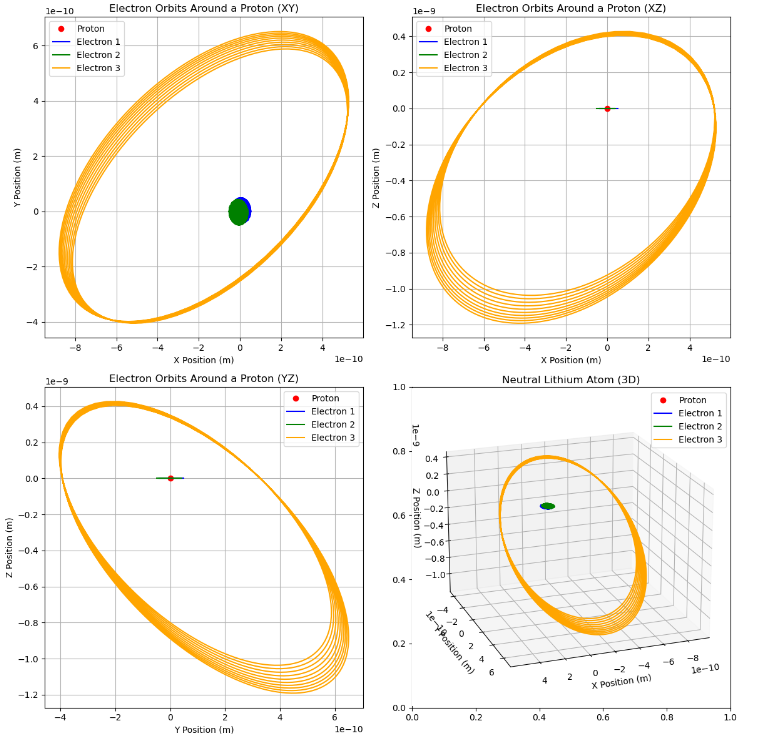

- The graph above visualizes a position that also produces an orbit considered to be stable. It has an interesting pattern and follows an elliptical orbit.

In [ ]:
electron_orbits([5.291e-11, 0, 0, 0, 2.8*1.188e6, 0*1.188e6],[-5.291e-11, 0, 0, 0, -2.8*1.188e6, 0*1.188e6],[-3.097758596604198e-10, 1.4265595213289157e-11, 5.231931450423911e-10, 0, 0.3*1.188e6, -0.5*1.188e6])

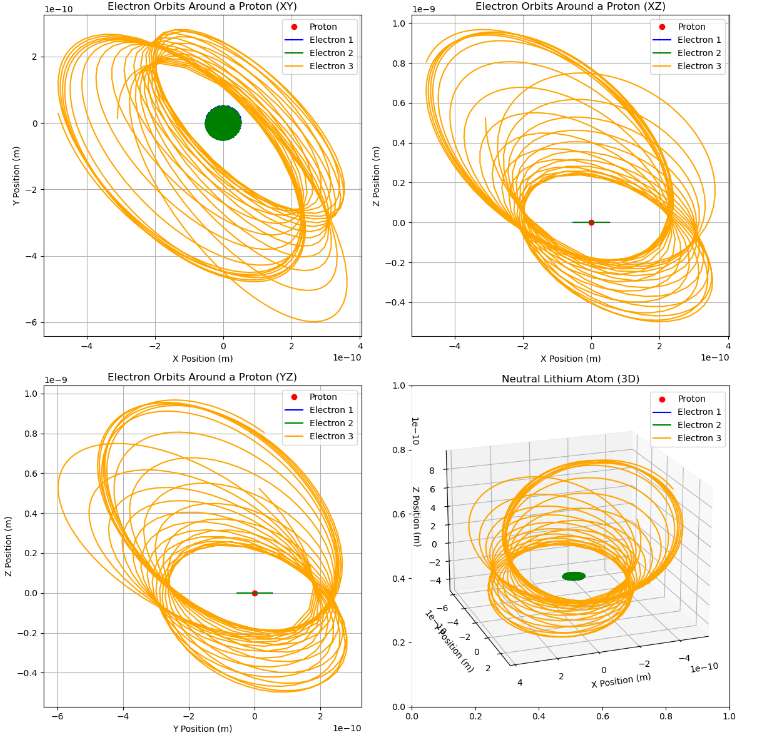

- The graph above visualizes a position that was also catagorized to be stable. This orbit does not follow a standard orbit and can be interpreted as chaotic stability.

In [ ]:
electron_orbits([5.291e-11, 0, 0, 0, 2.8*1.188e6, 0*1.188e6],[-5.291e-11, 0, 0, 0, -2.8*1.188e6, 0*1.188e6],[5.093234241450353e-10, -3.7271293457651154e-10, -2.322176051624321e-10, 0, 0.3*1.188e6, -0.5*1.188e6])

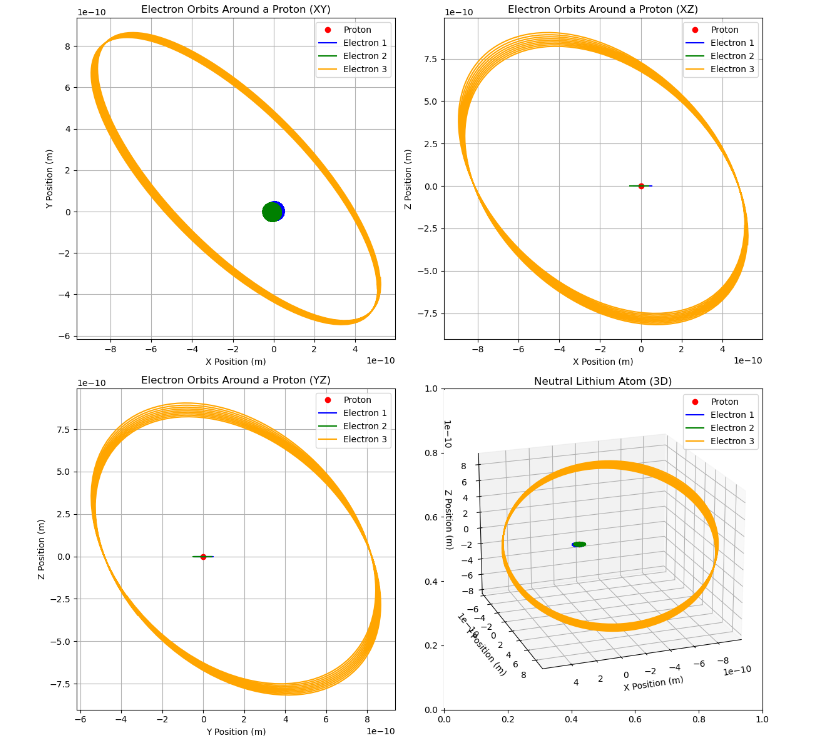

- The above graph visualizes an orbit very similar to in the second visualization as they both follow a tight elliptical orbit with slight deviation; however, both orbits are still considered stable

In [ ]:
electron_orbits([5.291e-11, 0, 0, 0, 2.8*1.188e6, 0*1.188e6],[-5.291e-11, 0, 0, 0, -2.8*1.188e6, 0*1.188e6],[-1.715836145619306e-10, -1.3800763155542837e-11, 4.896051175268645e-10, 0, 0.3*1.188e6, -0.5*1.188e6])

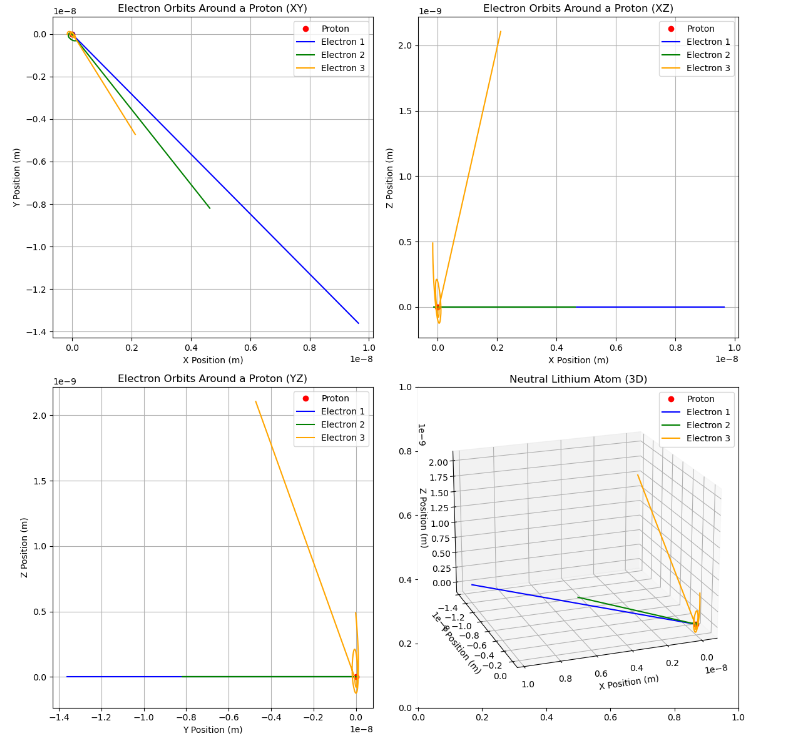

- The above graph visualizes a position showing a break down in stability based off of the initial position of the third electron. The time period the program has run for has been reduced for this visualization in order to better show how the orbits changed.

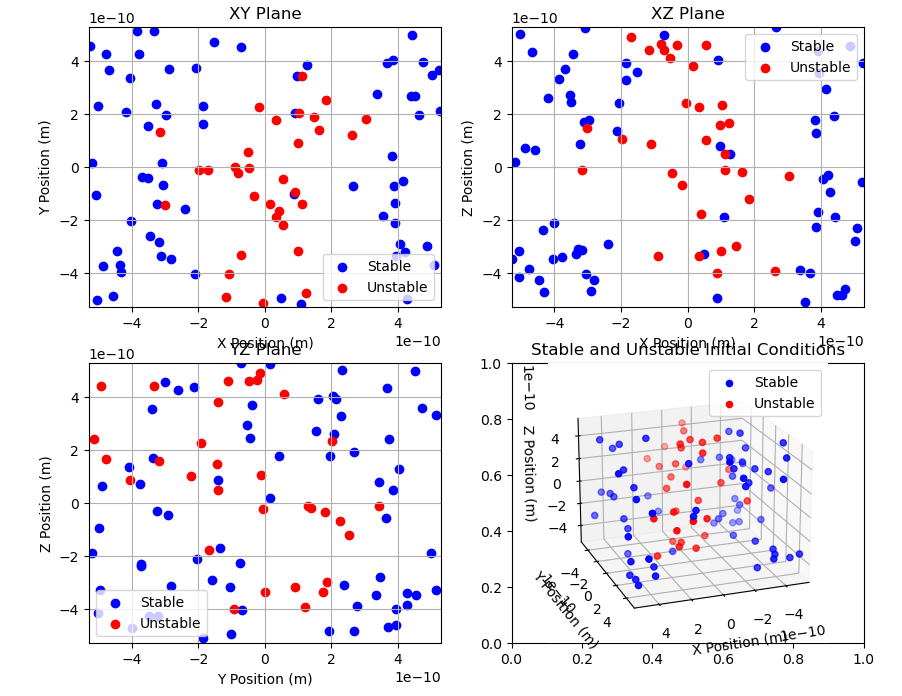

- The above visualization shows the points in the XY plane, XZ plane, YZ plane, as well as in three dimensions in which the randomized initial points are considered stable or unstable

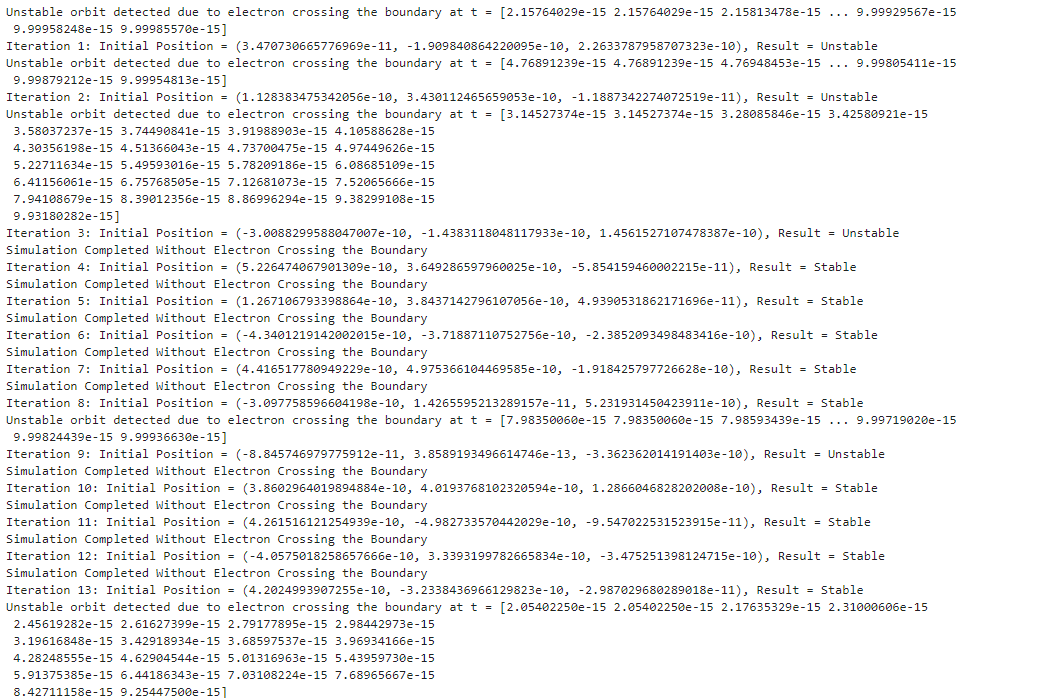

- The above code snippet was captured from the initial conditions stability test. After each iteration, the resulting initial condition used is printed along with the result and iteration number in order to error check the stability testing.

- None of the code cells have been run in order to minimize the effort for the TAs marking as the code, the stability code in particular, takes a quite a while to run.
- All code is working and will produce the same and or similar results as seen in the visualizations above.

# Synthesis and discussion
_(Use your results to dicuss the answer(s) to your research question(s). Make sure to provide quantitative answers to your questions and justify your conclusions based on information presented in the previous section. You should also discuss the limitations of your investigations, of your physical modelling and of your code, as well as the next steps if you were to continue working on this project.)_

**Introduction**

The purpose of this project was to find the area of most stability of the third electron in three dimensions and over the course of this research project I began to find the answer I was looking for.

What I initially thought to be a fairly interesting question quickly became challenging the more I continued working and there were several limitations and challenges that presented themselves during my coding process. 

**Challenges Faced**

The very first of which was creating a working model using real world constants. In order to get around this problem I began by setting all of my values to equal 1 or -1 (due to charge). This made it possible to see if the code I was writing for the orbits was working correctly. Once it was, I then began to integrate the real world constants into my function where I was then able to use multiples of the Bohr radius in order to find a range of initial position values. I then found the calculated value of the velocity of an electron and used multiples of that value in order to find the initial velocities I wished to use.

The second challenge I faced was in finding a proper definition for what I wished a stable orbit to be, as many methods that would normally be simple quickly became complex in three dimensions. Initially I tried finding deviations in the total energy of each electron as well as the total system. I thought the method was working; however, after continued use this method was far too inconsistent to be considered as a reliable method. Therefore, I tried switching to a measure of finding the eccentricity of the system over the given time period. This method was quickly discontinued as I was unsure of the math and also seemed to be causing more problems than what I could afford. 

**Methodology**

I turned to my third and simplest method in which I put a three dimensional box around my proton which would detect if an electron were to cross it. By making the box large enough there are no possibilities of stable electrons being incorrectly catagorized and therefore I was able to find my definition of stability. I think this definition is actually quite intriguing as it leaves enough room for the electron to move in patterns that would not typically be seen as stable (as visualized in the third electron orbit diagram). Using the error checking code, I randomized the initial position of the third electron over the range (-10x5.291e-11 m, 10x5.291e-11 m). This range was arbitrarily determined as I had found this magnitude of values to work best. I believe it most important to show the area in which there is the most instability as this will show where the forces interacting between the three electrons and proton becomes too great to maintain any sort of stability to the orbiting system. 

**Results**

By quantitatively examining the four scatter plots produced by my stability and error check I was able to determine that the closer the third proton is placed to the inner protons and electrons the greater the instability of the system will be. The reason that there doesn't seem to be a perfect circle of when the third electron is stable or not is due to the initial starting velocities used which consisted of having a y-component and a z-component causing more of a ellipsoid shape to indicate the area of stability. By observing these plots it can be seen that the x-range  of instability is within close to (-2.5e-10 m,2.5e10 m), the y-range of instability is within close to (-5e-10 m,3e-10 m), and the z-range of instability is within close to (-4e-10 m,5e-10 m). These results are able to show the area in which the third electron is least stable, and is therefore able to answer my question regarding its area of most stability over the given range.

**Future Steps**

If I were to continue working on this project I would likely increase the range of values as well as the number of iterations in order to better demonstrate where the area of instability for the electron would be. It makes sense logically that the closer the third electron gets the more unstable the orbit would be; however, it also makes sense that there should be a limit as to how far the third electron could be as well in order to have an unstable orbit. I think this is the next element of this project I would continue to research as it would no longer give a range of stability over a given range but instead would give the total area of stability.

**Conclusion**

In summary, this project aimed to find the most stable area for the third electron in a three-dimensional orbital system. Overcoming coding challenges, I refined the methodology, incorporating real-world constants and an simple and effective stability definition using a three-dimensional box. Results showed that the third electron's proximity to inner particles significantly impacts system instability, forming an elliptical stability area due to initial velocities. Future steps involve expanding ranges and iterations to explore instability limits and establish a definitive distance limit for the third electron, contributing to a broader understanding of three-dimensional electron orbits.


# References
_(In addition to citations for any python packages used beyond our standard ones, list the sources for any data or literature cited in your project. Additionally, you must also cite the sources for any code that you found on the internet or from peers.)_

- Chat GPT, chat gpt was able to help me with part of the formatting and debugging of my code when I was faced with unforeseen challenges. 

- Sidney Shapiro (peer feedback), Sidney helped me with my project as we frequently worked together on this project and he was able to give me advice from another perspective.

- Chantal Hemmann (peer feedback), Chantal helped me with my project as we frequently worked together on this project and he was able to give me advice from another perspective.

- mpl_toolkits.mplot_3d, https://matplotlib.org/1.3.0/mpl_toolkits/index.html (visualization), this is a simple toolkit from which I used  mplot3d in order to make a 3D subplot of my scatter and line graphs. It is not the fastest 3D library but ships with matplotlib and is a lighter weight solution which was easy to import.

# Self-evaluations
Please visit the rubric on the Project 02 submission for the detailed criteria to use in your self-assessments.

<br>

### *Self-assessment 1: Coding Approaches*
*(How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, more readable and/or more concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project. Highlight something you feel you did particularily well and discuss an aspect of your code that would benefit the most from an improvement.)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** 

(Publish)

**Discussion of your coding approaches and justification of your rating:** 

I am very proud of the code I have written as well as the time i have spent putting together a structured model that works well and is able to produce realistic results. I think my code could go from a publish to an outstanding by increasing the use of functions in my electron_orbit function as many of the lines of code are fairly repetitive. The reason I didn't do so was because I was not sure how to do so and when I tried using ChatGPT it suggested methods I had no understanding of so I decided not to implement them. I think my code is readable with comments describing what each section is used for and also produces very visually pleasing results. I am very proud of the error testing code I wrote that not only answers my question checking for the stability of the third electron but also serves as an error testing code as I can take any of the points printed and input them into my function.

I think most of this content is new to me as I have a limited coding background, a side from anything we had learned from previous lessons in 210, anything else present was essentially all learned throughout the length of this project. A new particular innovation is using the mpl_toolkits.mplot_3d import, and this was used to make a 2x2 subplot with one of which being a 3D graph. I am very happy with how everything turned out!

A couple of unforeseen challenges I faced were with finding the range of usable initial conditions once scaled down to such small values. This is due to any slight changes having a far greater affect on the orbit trajectories. I also found that I had some difficulties with getting my initial conditions stability test to properly output the results I had been getting. I was able to fix this by changing the way I catagorized stable and unstable orbits as well as the scale of the graphs I produced. It was a very long process as, due to the amount of iterations it had to go through 

### *Self-assessment 2: Physical modelling and investigation*
*(How well did you apply your and extend your physical modelling and scientific investigation skills in this project? Consider the phase space you chose to explore and how throroughly you explored it. Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of. Consider how thorough and compelling your error-testing evidence is in terms of your system funtioning correctly. Highlight something you feel you did particularily well and discuss an aspect of your modelling or investigation process that would benefit the most from an improvement.)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):**

(Outstanding // Publish)

**Discussion of your physical investigation and justification of your rating:** 

The code that I have written realistically models 3 orbiting electrons around a central proton using a saturnian model. I feel that I was able to very thoroughly apply my knowledge of physics and use scientific investigation to find conclusive and compelling evidence to help answer my question. By keeping the initial velocities set to a constant it made it more effective to find out what the area of most stability would be by varying the positions. It was very interesting having to consider not only the force felt from the proton on the electrons, but also from the electrons on each other.

The error testing evidence was very compelling as each of the first four visualizations show values that were taken from the initial position stability test function I created. Running for 100 iterations with many of the points tested in the visualization function I have created (electron_orbit), I have been able to conclusively find that my boundary function as well as my electron orbit function work properly.


<br>

### *Self-assessment 3: Effectiveness of your visualizations*
_(How effectively do your visualizations communicate the overall results of your investigations? Consider not only your visualizations section, but also any visualizations you used in error checking and building your confidence that your system is behaving as intended. Were any of your visualizations particularly insightful regarding identifying or resolving unphysical behaviour. Consider the steps you took to maximize how well your visualizations support your ability to answer your research questions. Highlight something you feel you did particularily well and discuss an aspect of your visualizations that would benefit the most from an improvement.)_

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** 

(Outstanding)

**Discussion of your thoroughness of effectiveness of your visualizations and justification of your rating:** 

I am very proud of the visualizations I have produced for this project. Not only are they visually pleasing, they also have an added level of complexity due to the addition of three dimensions. The use of the XY, XZ and YZ planes along with the 3D graph helps make the visualizations of the orbits easier to interpret from all angles. Some of the more insightful visualizations are the 3D orbit graph and the 3D scatter plot graph as both of these are able to accurately visualize the orbits of the system and the area of instability which was found for the third electron.  

I think that a visualization that could benefit from further improvement was the two that I believe the be the most insightful, the 3D orbit graph and the 3D scatter plot graph. The ways in which I would improve both of them is by first allowing the simulation to run for a longer amount of time, second to increase the range in which the initial positions could start, and third to increase the number of iterations over which I would test the stability. The reason that all of these are on a somewhat smaller scale is to reduce the amount of time needed in order to test the simulations as this is a time constrained project. However, the code would work if all of these improvements were made, it would simply be up to the amount of time able to be used.

<br>

### *Self-assessment 4: Interpretation of Results*
 *(How accurately and thoroughly did you interpret your results and discuss the key features of your data / results / visualizations? Do your results and discussions answer your research question(s)? Are your limitations and next steps sufficient to provide an accurate picture of your results and actionable next steps?)*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** (Publish)

**Discussion of your interpretation of results and justification of your rating:** 

I think that the interpretations of my results are accurate and discuss the key features that my visualizations provide. The results of my research project have answered my question as to the region of stability and instability over the given region I determined. 

I was able to determine the limits of my program and the conditions under which it will work. Thoughts on future plans were also provided which sufficiently states what the next steps I would take in this project would be given more time for research.